# Volume 4: The Shooting Method for BVPs
    Daniel Perkins
    MATH 439
    1/11/25

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [2]:
def secant_method(h, s0, s1, max_iter=100, tol=1e-8):
    """
    Finds a root of h(s)=0 using the secant method with the
    initial guesses s0, s1.
    """
    for i in range(max_iter):
        # Get the residuals
        h0 = h(s0)
        h1 = h(s1)
        # Update
        s2 = s1 - h1 * (s1 - s0)/(h1 - h0)
        s0, s1 = s1, s2
        
        # Check convergence
        if abs(h1) < tol:
            return s2
    
    print("Secant method did not converge")
    return s2

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may have several, and you may have to determine which solutions are physically interesting.

Use the secant method to solve the following BVP:
\begin{equation*}
\begin{split}
y'' &= -e^{y-1}, \quad x \in [0,1],\\
y(0) &=y(1) =1.
\end{split}
\end{equation*}
This BVP has two solutions.
Using the secant method, find both numerical solutions and print their initial slopes.
Plot the solutions.
What initial values $s_0, s_1$ did you use to find them?

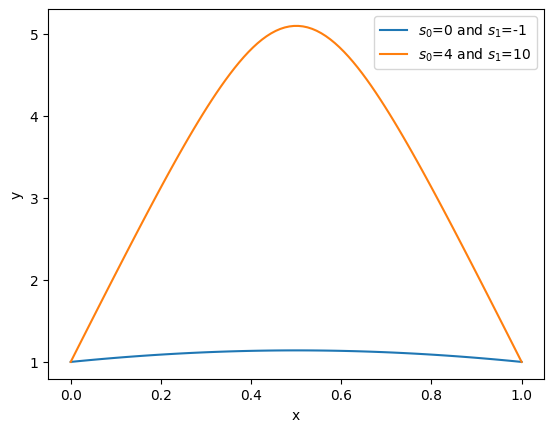

Initial Slope 1: 0.5492082775748592
Initial Slope 2: 4


In [ ]:
# Define the ODE right-hand side
def ode(x, y):
    return np.array([
        y[1],
        -np.exp(y[0]-1)
    ])

# Endpoint values
a = 0
b = 1
alpha = 1
beta = 1

# Define a residual function
def residual(s):
    sol = solve_ivp(ode, (a, b), [alpha, s])
    yb = sol.y[0, -1]
    return yb - beta

# Find the right value of s using the secant method
s0, s1 = (beta-alpha)/2, -1
s2, s3 = 4, 10
s = secant_method(residual, s0, s1)
new_s = secant_method(residual, s2, s3)

# Compute and plot the solution
x = np.linspace(a, b, 100)
y = solve_ivp(ode, (a, b), (alpha, s), t_eval=x).y[0]
y2 = solve_ivp(ode, (a, b), (alpha, new_s), t_eval=x).y[0]

# Plot it
plt.plot(x, y, label=rf"$s_0$={int(s0)} and $s_1$={s1}")
plt.plot(x, y2, label=rf"$s_0$={s2} and $s_1$={s3}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Print out initial slopes
print("Initial Slope 1:", s)
print("Initial Slope 2:", s2)


# Problem 2

Use Newton's method to solve the BVP
\begin{align*}
y'' &= 3 + \frac{2y}{x^2}, \,\, x \in [1,e],\\
y(1) &= 6, \\
y(e) &= e^2 + 6/e
\end{align*}
Plot your solution.

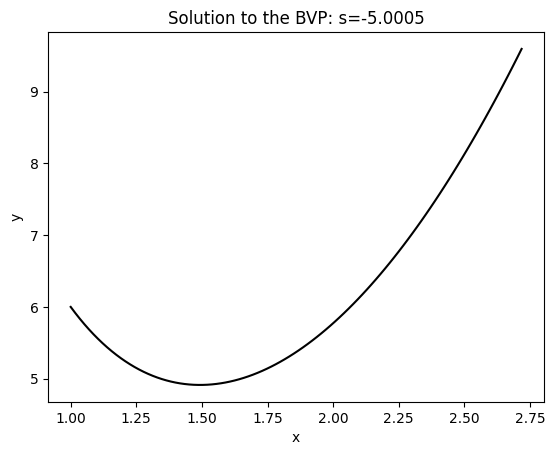

In [36]:
# Define the ODE right-hand side (above prob 2)
def ode(x, y):
    return np.array([
        y[1],
        3 + 2*y[0]/(x**2),
        y[3],
        2*y[2]/(x**2)
    ])
    
# Endpoint values
a = 1
b = np.e
alpha = 6
beta = np.e**2 + 6/np.e
x = np.linspace(a, b, 100)
s = 0  # Initial guess for s

# Iteratively solve for s
for i in range(100):
    initial_state = (6, s, 0, 1)
    # Compute the solution
    y, y_prime, z, z_prime = solve_ivp(ode, (a, b), initial_state, t_eval=x).y
    # Equation 17.5
    s = s - ((y[-1] - beta) / (z[-1]))
    
# Plot the solution
plt.plot(x, y, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Solution to the BVP: s={round(s,4)}")
plt.show()


0 seemed to be an appropriate initial guess. $s$ ended up being -5.

# Problem 3

Suppose we have a cannon that fires a projectile at a velocity of $45\text{ m/s}$, and the projectile has a mass of about $60$ kg, so that $\mu = .0003$.
At what angle $\theta(0)$ should it be fired to land at a distance of $195\text{ m}$?
Use the secant method to find initial values for $\theta$ that give solutions to the following BVP:
\begin{align}
	\begin{split}
\frac{dy}{dx} &= \tan {\theta} ,\\
\frac{dv}{dx} &= -\frac{g \sin{\theta} + \mu v^2}{v \cos{\theta}},\\
\frac{d\theta}{dx} &= -\frac{g}{v^2},\\
y(0)&= y(195) = 0,\\
v(0) &= 45 \text{ m/s}
	\end{split}
\end{align}
($g = 9.8067\text{ m/s}^2$.)

There are four initial angles $\theta(0)$ that produce solutions for this BVP when $\mu = 0.0003$.
Find and plot at least two of them.
Also find the two solutions when $\mu = 0$ (no air resistance), and compare.

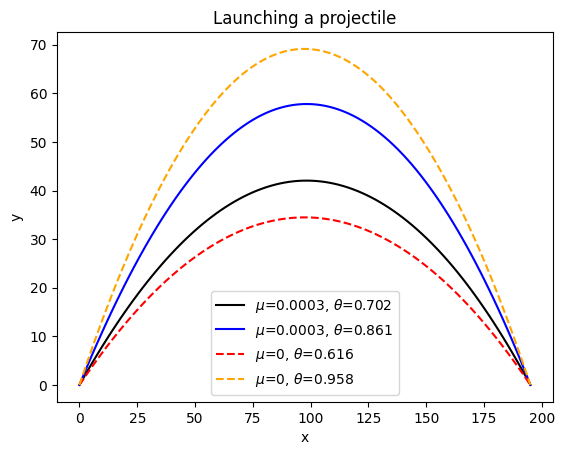

In [88]:
mu = 0.0003
mu2 = 0
g = 9.8067

# Define the ODE right-hand side
def ode(x, u):
    y, v, theta = u
    return np.array([
        np.tan(theta),
        -(g*np.sin(theta) + mu*v**2) / (v*np.cos(theta)),
        - g/(v**2) 
    ])
def ode2(x, u):
    y, v, theta = u
    return np.array([
        np.tan(theta),
        -(g*np.sin(theta) + mu2*v**2) / (v*np.cos(theta)),
        - g/(v**2) 
    ])

# Endpoint values
a = 0
b = 195
alpha = 0
beta = 0
v0 = 45

# Define a residual function
def residual(theta):
    sol = solve_ivp(ode, (a, b), (alpha, v0, theta))
    yb = sol.y[0, -1]
    return yb - beta
def residual2(theta):
    sol = solve_ivp(ode2, (a, b), (alpha, v0, theta))
    yb = sol.y[0, -1]
    return yb - beta

# Find the right value of s using the secant method
s0, s1 = 0, np.pi/4
s2, s3 = 3*np.pi/8, 5*np.pi/8
theta = secant_method(residual, s0, s1)
theta2 = secant_method(residual, s2, s3)
theta3 = secant_method(residual2, s0, s1)
theta4 = secant_method(residual2, s2, s3)


# Compute and plot the solution
x = np.linspace(a, b, 100)
y = solve_ivp(ode, (a, b), (alpha, v0, theta), t_eval=x).y[0]
y2 = solve_ivp(ode, (a, b), (alpha, v0, theta2), t_eval=x).y[0]
y3 = solve_ivp(ode2, (a, b), (alpha, v0, theta3), t_eval=x).y[0]
y4 = solve_ivp(ode2, (a, b), (alpha, v0, theta4), t_eval=x).y[0]

# Plot it
plt.title("Launching a projectile")
plt.plot(x, y, color="black", label=rf"$\mu$={mu}, $\theta$={np.round(theta,3)}")
plt.plot(x, y2, color="blue", label=rf"$\mu$={mu}, $\theta$={np.round(theta2,3)}")
plt.plot(x, y3, linestyle="dashed", color="red", label=rf"$\mu$={mu2}, $\theta$={np.round(theta3,3)}")
plt.plot(x, y4, linestyle="dashed", color="orange", label=rf"$\mu$={mu2}, $\theta$={np.round(theta4,3)}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
